___
# Ciência dos Dados - PROJETO 2

___
## Nome 1: João Laet Toledo César

## Nome 2: Vinicius de Paiva Hsu

___

___

## 1. Problema

O Classificador Naive-Bayes, o qual se baseia no uso do teorema de Bayes, é largamente utilizado em filtros anti-spam de e-mails. O classificador permite calcular qual a probabilidade de uma mensagem ser SPAM considerando as palavras em seu conteúdo e, de forma complementar, permite calcular a probabilidade de uma mensagem ser HAM dada as palavras descritas na mensagem.

Para realizar o MVP (minimum viable product) do projeto, você precisa programar uma versão do classificador que "aprende" o que é uma mensagem SPAM considerando uma base de treinamento e comparar o desempenho dos resultados com uma base de testes. 


___
## 2. Separação da base de dados em Treinamento e Teste

A base de dados deve ser separada em duas partes, aleatoriamente, considerando: 
    
    75% dos dados para a parte Treinamento; e
    25% dos dados para a parte Teste.

In [1]:
import pandas as pd
import os
from sklearn.utils import shuffle

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Camila\OneDrive - Insper - Institudo de Ensino e Pesquisa\Insper\3 B\DP Ciência dos Dados\Projeto 2


In [3]:
database = pd.read_excel('spamhamV2.xlsx')

In [4]:
dfal = shuffle(database)
dfal.head()
a = len(dfal)

In [5]:
print("75% do dataframe = " + str(int(a*0.75)+1) + " frases")
print("25% do dataframe = " + str(int(a*0.25)) + " frases")

75% do dataframe = 4180 frases
25% do dataframe = 1393 frases


In [6]:
teste = dfal.iloc[0:4181, :]
final = dfal.iloc[4181:, :]

O Dataframe inicial foi dividido em duas partes, 75% do dataframe original foi alocado aleatóriamente para um dataframe utilizado para o treinamento do classificador, os outros 25%,também aleatórios foram alocados em outro dataframe para realizar o teste de nosso classificador

___
## 3. Classificador Naive-Bayes

In [74]:
teste_limpo_spam=[]
teste_limpo_ham=[]

for i in range(0,teste.Email.size-1):
    if teste.iloc[i,1]=='spam':
        teste_limpo_spam.append(str(teste.iloc[i,0]).split())
    if teste.iloc[i,1]=='ham':
        teste_limpo_ham.append(str(teste.iloc[i,0]).split())
    

palavras_teste_spam=[]
palavras_teste_ham=[]

for i in teste_limpo_spam:
    for c in i:
        if c not in palavras_teste_spam:
            palavras_teste_spam.append(c)
            
for i in teste_limpo_ham:
    for c in i:
        if c not in palavras_teste_ham:
            palavras_teste_ham.append(c)


Neste momento, foram criadas listas, com as frases do dataframe de treinamento e posteriormente, uma lista que contém todas as palavras contidas nessas frases sem repetição.

In [8]:
probabilidade_ham=len(teste_limpo_ham)/(len(teste_limpo_ham)+len(teste_limpo_spam))*100
print("Probabilidade do e-mail ser ham: {}%".format (probabilidade_ham))

probabilidade_spam=len(teste_limpo_spam)/(len(teste_limpo_ham)+len(teste_limpo_spam))*100
print("Probabilidade do e-mail ser spam: {}%".format (probabilidade_spam))



Probabilidade do e-mail ser ham: 86.5311004784689%
Probabilidade do e-mail ser spam: 13.4688995215311%


Com as listas formadas, foram calculadas as probabilidades de cada e-mail ser ham ou spam, com base na quantidadde de cada um dentro do total

In [9]:
palavrasspam=[]
for i in teste_limpo_spam:
    for a in i:
        palavrasspam.append(a)


palavrasham=[]

for i in teste_limpo_ham:
    for a in i:
        palavrasham.append(a)



Palavrasham = []
for i in range (len(palavrasham)):
    a = palavrasham[i].title()
    Palavrasham.append(a)
Palavrasspam = []
for i in range (len(palavrasspam)):
    b = palavrasspam[i].title()
    Palavrasspam.append(b)
    

In [10]:
probabilidade_word_spam = len(Palavrasspam) / (len(Palavrasham) + len(Palavrasspam))*100
print("Probabilidade palavra ser spam: {}%".format (probabilidade_word_spam))

probabilidade_word_ham = len(Palavrasham) / (len(Palavrasham) + len(Palavrasspam))*100
print("Probabilidade palavra ser ham: {}%".format (probabilidade_word_ham))

Probabilidade palavra ser spam: 20.68415510406343%
Probabilidade palavra ser ham: 79.31584489593658%


Mais além, foi feito o mesmo cálculo das frases, para as palavras, utilizando a mesma lógica podemos dizer a probabilidade de uma palavra ser ham ou spam dentro de um universo de palavras

In [11]:
dicHAM = {}
for i in range (len(Palavrasham)):
    if Palavrasham[i] in dicHAM:
        dicHAM[Palavrasham[i]] = dicHAM[Palavrasham[i]] + 1
    else:
        dicHAM[Palavrasham[i]] = 1

dicSPAM = {}
for i in range (len(Palavrasspam)):
    if Palavrasspam[i] in dicSPAM:
        dicSPAM[Palavrasspam[i]] = dicSPAM[Palavrasspam[i]] + 1
    else:
        dicSPAM[Palavrasspam[i]] = 1

Foi criado um dicionário que possui cada palavra com a contagem do número de vezes que ela apareceu em um e-mail spam. O mesmo dicionário foi feito para as palavras de e-mail classificados préviamente como ham. 

In [12]:
palavras_total=[]
for i in dicHAM:
    if i not in palavras_total:
        palavras_total.append(i)
for i in dicSPAM:
    if i not in palavras_total:
        palavras_total.append(i)

Criação de um dicionário com todas as palavras que apareceram nos e-mail independente de sua classificação, para efeito de contagem.

In [75]:
#probabilidade de uma mesagem ser ham
lista_teste=[]
classificador=[]

for i in range(len(final)):
    lista_teste.append(final.iloc[i,0].split())
    
for i in lista_teste:
    Probabilidade_ser_ham=[]
    Probabilidade_ser_spam=[]
    for z in i:         
        if z in dicHAM:
            a=(dicHAM[z]/len(Palavrasham))+(1/len(palavras_total))
            b=1/len(palavras_total)
            Probabilidade_ser_ham.append(a)
            Probabilidade_ser_spam.append(b)
            
        if z in dicSPAM:
            a=(dicSPAM[z]/len(Palavrasspam))+(1/len(palavras_total))
            b=1/len(palavras_total)
            Probabilidade_ser_ham.append(b)
            Probabilidade_ser_spam.append(a)
            
    probabilidade_frase_ham=1
    probabilidade_frase_spam=1
    
    for o in Probabilidade_ser_ham:
        probabilidade_frase_ham=probabilidade_frase_ham*o
        
    for o in Probabilidade_ser_spam:
        probabilidade_frase_spam=probabilidade_frase_spam*o  
       
    if Probabilidade_ser_spam>Probabilidade_ser_ham:
        #print("Spam")
        classificador.append("Spam")


    if Probabilidade_ser_ham>Probabilidade_ser_spam:
        #print("Ham")
        classificador.append("Ham")
        
    if Probabilidade_ser_ham==Probabilidade_ser_spam:
        classificador.append("Ham")

final["Classificador"]=classificador

C:\Users\Camila\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Na célula acima foram feitos diversos cálculos probabilísticos, para saber a chance de um e-mail ser spam ou ham, dado as palavras contidas nele e as probabilidades de cada uma de serem classificadas de uma das duas formas. Esse cálculo foi feito pela multipicação das probabilidades de cada palavra da a fórmula para cada uma: (n° repetição da palavra/n° palavras spam) + (1/n° palavras no total)

In [34]:
final

,Email,Class,Classificador
3715,Networking technical support associate.,ham,Ham
2429,How was txting and driving,ham,Ham
3025,I finished my lunch already. U wake up already?,ham,Ham
4618,"Sorry, I'll call later In meeting.",ham,Ham
780,Your opinion about me? 1. Over 2. Jada 3. Kusr...,ham,Ham
407,Hello! Good week? Fancy a drink or something l...,ham,Ham
1240,Oh yes I can speak txt 2 u no! Hmm. Did u get ...,ham,Ham
2335,\Aww you must be nearly dead!Well Jez isComing...,ham,Ham
1558,Message from . I am at Truro Hospital on ext. ...,ham,Ham
5138,Yup... I havent been there before... You want ...,ham,Ham


Temos acima uma amostra de nosso dataframe final, com uma coluna, a última, criada a partir de nosso classificador

In [79]:
VN = 0
VP = 0
FN = 0
FP = 0

for i in range (len(final)):
    if final.iloc[i,2]=="Ham":
        if final.iloc[i,1]=="ham":
            VP=VP+1
        if final.iloc[i,1]=="spam":
            FP=FP+1

    if final.iloc[i,2]=="Spam":
        if final.iloc[i,1]=="spam":
            VN=VN+1
        if final.iloc[i,1]=="ham":
            FN=FN+1

acerto_spam = VN/(VN+FN)*100
acerto_ham= VP/(VP+FP)*100
print("Porcentagem de acerto de e-mails ham: {}%".format (acerto_ham))
print("Porcentagem de acerto de e-mails spam: {}%".format (acerto_spam))


Porcentagem de acerto de e-mails ham: 88.23529411764706%
Porcentagem de acerto de e-mails spam: 97.91666666666666%


Os números finais de acerto para nosso classificador foram significamente altos, tendo uma porcentagem de acerto de 98% do emails spam e de aproximadamente 88% de e-mail ham

In [80]:
import math

PT = VP+FP
NT= VN+FN
acuracia = (VP+VN)/(PT+NT)
sensibilidade = VP/(VP+FN)
especificidade = VN/(VN+FP)
eficiencia = (sensibilidade+especificidade)/2
verdadeiropp = VP/(VP+FP)
verdadeiropn = VN/(VN+FN)

CoeficientePhi = (VP*VN - FP*FN) / math.sqrt((VP + FP)*(VP + FN)*(VN + FP)*(VN + FN))

___
## 5. Qualidade do Classificador alterando a base de treinamento

In [70]:
AS = []
AH = []
lista_especi=[]
lista_sensi=[]

for i in range (1000):
    dfal = shuffle(database)
    teste = dfal.iloc[0:4181, :]
    final = dfal.iloc[4181:, :]
    teste_limpo_spam=[]
    teste_limpo_ham=[]
    
    for i in range(0,teste.Email.size-1):
        if teste.iloc[i,1]=='spam':
            teste_limpo_spam.append(str(teste.iloc[i,0]).split())
        if teste.iloc[i,1]=='ham':
            teste_limpo_ham.append(str(teste.iloc[i,0]).split())
    palavras_teste_spam=[]
    palavras_teste_ham=[]
    
    for i in teste_limpo_spam:
        for c in i:
            if c not in palavras_teste_spam:
                palavras_teste_spam.append(c)
                
    for i in teste_limpo_ham:
        for c in i:
            if c not in palavras_teste_ham:
                palavras_teste_ham.append(c)
                
    probabilidade_ham=len(teste_limpo_ham)/(len(teste_limpo_ham)+len(teste_limpo_spam))*100
    probabilidade_spam=len(teste_limpo_spam)/(len(teste_limpo_ham)+len(teste_limpo_spam))*100
    dicHAM = {}
    
    for i in range (len(Palavrasham)):
        if Palavrasham[i] in dicHAM:
            dicHAM[Palavrasham[i]] = dicHAM[Palavrasham[i]] + 1
        else:
            dicHAM[Palavrasham[i]] = 1
    dicSPAM = {}
    
    for i in range (len(Palavrasspam)):
        if Palavrasspam[i] in dicSPAM:
            dicSPAM[Palavrasspam[i]] = dicSPAM[Palavrasspam[i]] + 1
        else:
            dicSPAM[Palavrasspam[i]] = 1
    palavras_total=[]
    
    for i in dicHAM:
        if i not in palavras_total:
            palavras_total.append(i)
    for i in dicSPAM:
        
        if i not in palavras_total:
            palavras_total.append(i)
    lista_teste=[]
    classificador=[]
    
    for i in range(len(final)):
        lista_teste.append(final.iloc[i,0].split())
        
    for i in lista_teste:
        Probabilidade_ser_ham=[]
        Probabilidade_ser_spam=[]
        
        for z in i:         
            if z in dicHAM:
                a=(dicHAM[z]/len(Palavrasham))+(1/len(palavras_total))
                b=1/len(palavras_total)
                Probabilidade_ser_ham.append(a)
                Probabilidade_ser_spam.append(b)
                
            if z in dicSPAM:
                a=(dicSPAM[z]/len(Palavrasspam))+(1/len(palavras_total))
                b=1/len(palavras_total)
                Probabilidade_ser_ham.append(b)
                Probabilidade_ser_spam.append(a)
                
        probabilidade_frase_ham=1
        probabilidade_frase_spam=1
        
        for o in Probabilidade_ser_ham:
            probabilidade_frase_ham=probabilidade_frase_ham*o
            
        for o in Probabilidade_ser_spam:
            probabilidade_frase_spam=probabilidade_frase_spam*o 
            
        if Probabilidade_ser_spam>Probabilidade_ser_ham:
            classificador.append("Spam")
            
        if Probabilidade_ser_ham>Probabilidade_ser_spam:
            classificador.append("Ham")
            
        if Probabilidade_ser_ham==Probabilidade_ser_spam:
            classificador.append("Ham")
            
    final["Classificador"]=classificador
    
    VN = 0
    VP = 0
    FN = 0
    FP = 0

    for i in range (len(final)):
        if final.iloc[i,2]=="Ham":
            if final.iloc[i,1]=="ham":
                VP=VP+1
            if final.iloc[i,1]=="spam":
                FP=FP+1

        if final.iloc[i,2]=="Spam":
            if final.iloc[i,1]=="spam":
                VN=VN+1
            if final.iloc[i,1]=="ham":
                FN=FN+1
    sensibilidade = VP/(VP+FN)
    especificidade = VN/(VN+FP)
    lista_sensi.append(sensibilidade)
    lista_especi.append(especificidade)
    
    acerto_spam = VN/(VN+FN)*100
    acerto_ham= VP/(VP+FP)*100
    AS.append(acerto_spam)
    AH.append(acerto_ham)

C:\Users\Camila\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Para verificar a influência do dataframe de treinamento no desempenho do classificador, rodamos diversas o código alterando aleatóriamente os mesmos 75% de e-mail utilizados para treinamento. Para visualização efetiva da diferença, guardamos os dados de porcentagem de acerto para ham e spam  e posteriormente fizemos uma média simples apenas para efeito de comparação entre os diversos databases.

In [82]:
Porcentagem_total=[]
for a in range(len(AS)):
    b=(AS[a]+AH[a])/2
    Porcentagem_total.append(b)

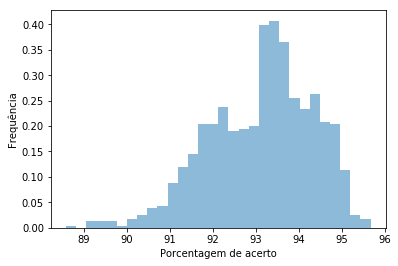

In [85]:
plt.hist(Porcentagem_total, normed=True, bins=30,  alpha=0.5)
plt.xlabel('Porcentagem de acerto')
plt.ylabel("Frequência")
plt.show()

Como resultado dessa análise podemos ver que a mudança no dataframe de treinamento altera perceptivelmente a eficácia do classificador, apesar disso, o classificador obteve em geral um bom desempenho, sempre acima dos 88% de acerto. 

## 4. Curva ROC

C:\Users\Camila\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


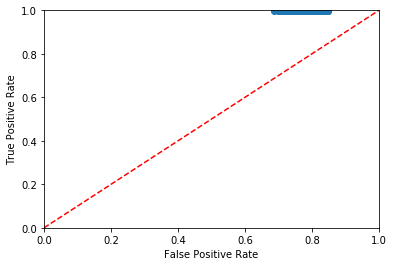

In [107]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
lista_especi2=[]

for i in lista_especi:
    lista1=1-i
    lista_especi2.append(lista1)

plt.plot(lista_especi2,lista_sensi,'o')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 


Aparentemente, pela definição de curva ROC, a curva obtida pelos diferentes valores de verdadeiro positivos e negativos encontrados devido aos diversos databases criados, está muito próximo da perfeição, indicando que o classificador é bastante confiável. Isso pode ser explicado pela, atribuição correta de valor ham ou spam à frases que possuem uma probabilidade parecida de ser classificada como qualquer uma das dua possibilidades. E que, portanto, o cutoff utilizado de 0,5 se mostrou bastante preciso

#### Resultado: 
Em geral, o classificador montado pela dupla se mostrou bastante satisfatório tendo grande porcentagem de acerto em todos os databases aleatóriamente selecionados, apesar da diminuição dessa porcentagem em alguns casos, mas que nunca foi inferior a 88%, um número bastante alto. Além disso a curva ROC surpreendeu por esta semelhante a definição de um classificador perfeito e portanto extremamente confiável.